In [1]:
import numpy as np

#%matplotlib qt  #cette ligne n'est pas indispensable
# si `%matplotlib qt` est activée, on aura les figures dans des fenêtres séparées, ce qui permet d'interagir avec la figure:
# zoomer, faire défiler, faire tourner (si figure en 3D)
# IMPORTANT: si vous commentez %matplotlib qt et importez ensuite `import matplotlib.pyplot as plt`, 
# vous ne pouvez plus réactiver l'interactivité. Pour le faire, il faudra faire 
# Noyau > Redémarrer...
# inversement, une fois activée, il faut redémarrer le noyau, puis `import matplotlib.pyplot as plt` sans utiliser la ligne `%matplotlib qt`

import matplotlib.pyplot as plt

# TP 2 - premier algorithme : les K-moyennes

## Partie 1 - briques de base de l'algorithme

In [2]:
## on charge les données à D=2 dimensions.
X = np.loadtxt("tp1-data-2.dat")

On va maintenant écrire l'algorithme des K-moyennes. Il a été décrit en cours. 

C'est un algorithme très simple qui vise a consitituer des groupes de points, lorsque ces points sont similaires.

On rappelle que:
- le représentant d'un groupe (ou *cluster*) est le point qui est e barycentre des points appartenant au groupe.
- un point appartient à un groupe lorsqu'il est plus proche de son représentant que des autres représentants.

Conseil: créer 4 fonctions au moins:
- une qui met à jour les représentants, à partir d'une affectation des points à chaque groupe
- une qui met à jour les affectation,  à partir des représentants de chaque groupe
- une qui calcule la distance entre 2 points
- une qui calcule le barycentre d'un nombre quelconque de points
À chaque fois, écrire d'abord sur papier ce que vous souhaitez, écrivez la fonction d'abord en tatonnant (hors fonction, pour un debug plus facile, sur un cas simple). Une fois mise dans une fonction, testez la fonction.

Astuces: 
- il existe une fonction `np.argmin`
- il existe une fonction `np.sum`. On peut sommer seulement le long d'un des axes avec le mot-clef `axis`.
- pour mettre `x` à la puissance `a`, on fait `x**a`
- commencer par des représentants aléatoires (code fourni), et donc commencer par la bonne mise à jour
- testez vos fonctions lors de leur écriture, et seulement ensuite, faites la boucle globale qui constitue l'algo des K-moyennes
- en python, il est très efficace de faire des opérations vectorielles plutôt que des boucles et des tests. En particulier, on peut définir le masque : `masque = (tab2 > valeurSeuil)` puis on pourra filtrer un autre tableau `tab1` (si il a la même taille que `tab2`) ainsi: `tab1[masque]`. On aura ainsi seulement les valeurs de `tab1` qui respectent la condtion `tab2 > valeurSeuil`

In [3]:
## exemple de masque: (ici, de tab1 sur lui meme)
tab1 = np.random.random((3,3))*10
tab2 = tab1
masque = tab2>5
selection = tab1[masque]
tab1, tab2, masque, selection

(array([[5.31725842, 5.08782969, 7.98860658],
        [8.26983157, 1.8020075 , 4.95433358],
        [6.59796763, 3.15250573, 0.50211349]]),
 array([[5.31725842, 5.08782969, 7.98860658],
        [8.26983157, 1.8020075 , 4.95433358],
        [6.59796763, 3.15250573, 0.50211349]]),
 array([[ True,  True,  True],
        [ True, False, False],
        [ True, False, False]]),
 array([5.31725842, 5.08782969, 7.98860658, 8.26983157, 6.59796763]))

### À vous de jouer !

On vous donne quelques éléments à compléter:

In [4]:
N = X.shape[0] #nb de données
D = 2 #dim des données
K = 3 #nb de clusters

In [5]:
affectations = np.zeros((N))
representants_initiaux = np.random.random((K,D))

In [6]:
representants = representants_initiaux
representants

array([[0.86151632, 0.3170384 ],
       [0.10336215, 0.32328285],
       [0.06525832, 0.67165759]])

--------

### Fonction Barycentre

On donne un exemple de fonction: la fonciton barycentre

In [7]:
def barycentre(X):
    Nselection = X.shape[0]
    D = X.shape[1]
    if Nselection != 0:
        resultat = X.sum(axis=0)/Nselection
    else:
        resultat = X.sum(axis=0)*0.0
    return resultat

In [8]:
## test
X[:2], barycentre(X[:2])

(array([[2.6060773 , 5.51412984],
        [2.13180305, 2.63671423]]), array([2.36894018, 4.07542204]))

In [9]:
## test
X[:3], barycentre(X[:3])

(array([[2.6060773 , 5.51412984],
        [2.13180305, 2.63671423],
        [1.06512834, 2.92994341]]), array([1.93433623, 3.69359583]))

### Fonction de calcul de la distance

Si ça vous amuse, vous pouvez utilisez d'autres distances que la norme Euclidienne (par exemple, la distance de Manhattan, ou bien la norme max...)

In [10]:
def Euc_dist(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2, axis=1))

In [11]:
a = np.random.rand(1, 3)
b = np.random.rand(1, 3)
Euc_dist(a,b)

array([0.604115])

### Fonction de mise à jour des affectations à un groupe

Chaque point est affecté à un groupe exactement.

In [12]:
def maj_affectations(X, r):
    """
    params : 
    X : data
    r : centers
    return : 
    assignement array
    """
    a = np.zeros(N)
    for i in range(N):
        dist = Euc_dist(X[i,:],r)
        a[i] =  np.argmin(dist)
    return a

In [13]:
## test
affectations = maj_affectations(X, representants)
affectations[:100]

array([2., 0., 2., 0., 2., 0., 0., 2., 2., 1., 1., 1., 2., 2., 0., 2., 0.,
       1., 1., 1., 2., 0., 2., 1., 0., 2., 2., 0., 0., 2., 1., 0., 1., 0.,
       0., 2., 2., 1., 0., 0., 2., 1., 2., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 2., 2., 1., 2., 1., 2., 0., 2., 0., 1., 2.,
       1., 0., 2., 2., 2., 0., 2., 2., 0., 1., 2., 2., 2., 0., 2., 1., 0.,
       0., 1., 2., 0., 1., 2., 0., 1., 1., 2., 2., 0., 0., 0., 2.])

### Fonction de mise à jour des représentants de groupe (cluster=groupe)

In [14]:
def maj_representants(X, a):
    """
    params : 
    X : data
    a : assignment array
    return : 
    centers array
    """
    r = np.zeros((K,D))
    for k in range(K):
        Xk = np.where(a==k)
        if(len(Xk)!= 0):
            r[k,:] = barycentre(X[Xk[0],:])
    return r


In [15]:
## test
representants = maj_representants(X, affectations)
representants

array([[ 2.54186254,  2.23729186],
       [-1.15785343, -1.06329927],
       [ 1.32112406,  5.28841545]])

## Partie 2: combiner les briques

### K-moyenne: mise en boucle

- mettez bout-à-bout ces briques, dans une boucle (après avoir initialisé ce qu'il faut).
- testez la boucle d'itération: par exemple avec 20 itérations.
- testez aussi l'algorithme pour K=3, ou K=15

In [16]:
X = np.loadtxt("tp1-data-2.dat")
N = X.shape[0]
D = 2
K = 2
affectations = np.zeros(N)
representants_initiaux = np.random.random((K,D))
representants = representants_initiaux

In [17]:
representants= representants_initiaux
itmax = 20
for it in range(itmax) :
    a = maj_affectations(X, representants)
    representants = maj_representants(X, a)
print(representants)

[[-0.36900804 -0.72764794]
 [ 1.99145668  4.22968101]]


### Représentation graphique

Avec `plt.scatter`, représenter les points associés au groupe 1, puis ceux du groupe 2, sur une même figure. Ils devraient apparaître de deux couleurs différentes. Utilisez des masques.
Idéalement, faites une boucle pour k de 1 à K.

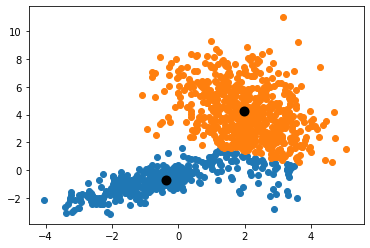

In [18]:
fig,ax = plt.subplots()
affectations = a
g=[]
for k in range(K) :
    gk = (affectations==k)
    g.append(gk)
    ax.scatter(X[g[k],0],X[g[k],1])
ax.scatter(representants[:,0],representants[:,1],color="k",lw=4)

[[ 2.27067213  2.23791671]
 [-0.96840322 -1.00938525]
 [ 1.65731424  5.77827737]]


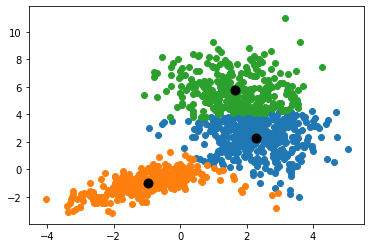

In [19]:
K = 3
affectations = np.zeros(N)
representants_initiaux = np.random.random((K,D))
representants = representants_initiaux

representants= representants_initiaux
itmax = 20
for it in range(itmax) :
    a = maj_affectations(X, representants)
    representants = maj_representants(X, a)
print(representants)


fig,ax = plt.subplots()
affectations = a
g=[]
for k in range(K) :
    gk = (affectations==k)
    g.append(gk)
    ax.scatter(X[g[k],0],X[g[k],1])
ax.scatter(representants[:,0],representants[:,1],color="k",lw=4)

[[ 1.72066625  1.04696933]
 [-1.39284968 -1.59014598]
 [-2.71275284 -2.22293249]
 [ 1.9033916   5.55016465]
 [ 0.35937289 -0.05417309]
 [ 1.13916483  7.27947404]
 [ 3.32449679  1.53710051]
 [ 3.06260093  3.93121736]
 [-1.74241367 -0.80149657]
 [ 2.02898527  2.64295588]
 [ 2.73799634 -0.79228149]
 [ 1.08646622  4.06683035]
 [-0.73210639 -0.33351612]
 [ 0.27768962  2.65793679]
 [-0.35725003 -1.0496007 ]]


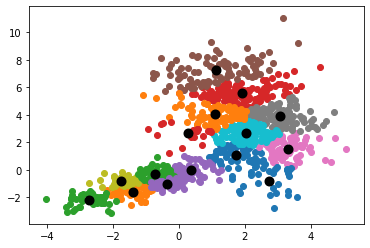

In [20]:
K = 15
affectations = np.zeros(N)
representants_initiaux = np.random.random((K,D))
representants = representants_initiaux

representants= representants_initiaux
itmax = 20
for it in range(itmax) :
    a = maj_affectations(X, representants)
    representants = maj_representants(X, a)
print(representants)


fig,ax = plt.subplots()
affectations = a
g=[]
for k in range(K) :
    gk = (affectations==k)
    g.append(gk)
    ax.scatter(X[g[k],0],X[g[k],1])
ax.scatter(representants[:,0],representants[:,1],color="k",lw=4)

##### Partie 3: mise au propre

### Création d'une classe python.

Idéalement, une fois vos 4 fonctions crées, 
- faites une classe, dans laquelle tout le boulot est fait.
- testez votre classe.

In [21]:
class Kmoyennes:

    def __init__(self,K,IterationMax): ## instanciation d'un objet du type de la classe.
        self.K = K
        self.N = 0
        self.D = 0
        self.IterationMax = IterationMax
        self.affectations = np.zeros((self.N))
        self.representants = np.zeros((self.K,self.D))
    
    def fit(self,X):
        self.N = X.shape[0]
        self.D = X.shape[1]
        representants_initiaux = np.random.random((self.K,self.D))
        representants = representants_initiaux       
        ## boucle (comme plus haut)
        for it in range(self.IterationMax) :
            affectations = maj_affectations(X, representants)
            representants = maj_representants(X, a)
            ## on affecte le resultat dans les variables membres de la classe.
            self.representants = representants
            self.affectations = affectations
        return self.representants
    
    def barycentre(self,X):
        Nselection = X.shape[0]
        if Nselection != 0:
            resultat = X.sum(axis=0)/Nselection
        else:
            resultat = X.sum(axis=0)*0.0
        return resultat
    
    def maj_affectations(self, X, r):
        a = np.zeros(N)
        for i in range(N):
            dist = Euc_dist(X[i,:],r)
            a[i] =  np.argmin(dist)
        return a
    def maj_representants(self, X, a):
        r = np.zeros((K,D))
        for k in range(K):
            Xk = np.where(a==k)
            if(len(Xk)!= 0):
                r[k,:] = self.barycentre(X[Xk[0],:])
        return r


On instancie un objet, nommé `Km`, du type "classe Kmoyennes"
seule la fonction `__init__` est appellée, à ce stade.

In [22]:
K=3
Km = Kmoyennes(K=K, IterationMax=10)

On appelle la fonction membre `fit`, contenue dans l'objet `Km`

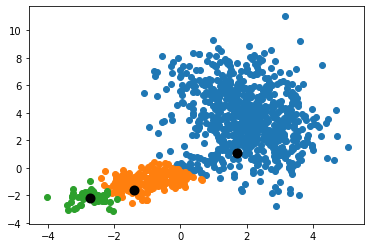

In [23]:
Km.fit(X=X) 
affectations = Km.affectations
representants = Km.representants

## faire le tracé (scatter plot)
fig,ax = plt.subplots()
g=[]
for k in range(K) :
    gk = (affectations==k)
    g.append(gk)
    ax.scatter(X[g[k],0],X[g[k],1])
ax.scatter(representants[:,0],representants[:,1],color="k",lw=4)

## Partie 4 - jouons avec notre algorithme

- Répéter l'invocation complète plusieurs fois. Les couleurs peuvent s'inverser, parfois. Comprenez vous pourquoi ?
- Que se passe-t-il si on bride le nombre d'itérations? En particuiler, pour seulement 1 ou 2 itérations?
- Que se passe-t-il si on applique notre algo sur le data-set à une dimension, `tp1-data-1.dat` ?

Astuce: pour les données à 1D, il faudra comparer l'objet `X` et `X.reshape((-1,1))`. En particulier, observez leur forme (la valeur de leur sattribut `.shape`)

Astuce 2: pour le tracé du réultat à 1D, plutot que de faire un scatter plot, on peut faire un histogramme pour chaque groupe. (on peut utiliser `plt.hist` pour aller vite).